### we need tensorflow and keras at least

In [1]:
# !pip install tensorflow
# !pip install keras

In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../")

from src.enzyme_hackathon.utils import (one_hot_dict, one_hot_encode, one_hot_encode_screening_data,
                                        one_hot_encode_sequences)
from src.enzyme_hackathon.utils import AA_LABELS

Using TensorFlow backend.


In [3]:
regression_df = pd.read_csv("../data/raw/challenge-0.csv")
df0 = regression_df
df1 = pd.read_csv("../data/raw/challenge-1.csv")
df2 = pd.read_csv("../data/raw/challenge-2.csv")
print(regression_df.describe(), df1.describe(), df2.describe())

        Unnamed: 0  performance    stability  productivity      fitness
count  7000.000000  6896.000000  6878.000000   7000.000000  6878.000000
mean   4010.524714     0.984543     0.781275      1.215665     0.898539
std    2299.783102     0.283531     0.324650      0.462164     0.491000
min       0.000000     0.000000     0.000000      0.000000     0.000000
25%    2026.750000     0.911732     0.499931      0.992109     0.494338
50%    4000.500000     0.997816     0.841235      1.016482     0.891317
75%    5999.250000     1.169030     1.000279      1.501715     1.266698
max    7999.000000     2.253050     2.493611      3.035927     1.940561         Unnamed: 0  performance    stability  productivity      fitness
count  9906.000000  9838.000000  9719.000000   9906.000000  9906.000000
mean   5001.255704     1.077744     1.093033      1.173327     1.330397
std    2884.806712     0.331799     0.317386      0.356221     0.515413
min       1.000000     0.000000     0.000000      0.000000     0

In [4]:
from collections import OrderedDict
encoded_split_dict = one_hot_encode_screening_data(regression_df)
x_train, x_test = (encoded_split_dict['x'][0], encoded_split_dict['x'][1])
y_keys = encoded_split_dict['y'].keys()

y_train, y_test = (OrderedDict(), OrderedDict())
for y_key in y_keys:
    y_train[y_key], y_test[y_key] = (encoded_split_dict['y'][y_key]['data'][0], encoded_split_dict['y'][y_key]['data'][1])

## Regression for the challenge 0

In [5]:
regression_df[regression_df['performance'].notna()]['performance'].plot.hist()

In [6]:
regression_df.head()

,Unnamed: 0,sequence,performance,stability,productivity,fitness
0,6282,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,1.003435,1.302323,1.484974,1.940561
1,2238,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,0.915861,0.841795,2.515523,1.939386
2,140,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,0.916377,0.850130,2.489326,1.939284
3,1376,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,0.994438,1.982315,0.983758,1.939272
4,4883,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,1.247429,1.496638,1.038111,1.938101


In [10]:
import string
def string_vectorizer(sequence, alphabet=string.ascii_uppercase):
    vector = [[0 if char != letter else 1 for char in alphabet] 
                  for letter in sequence.upper()]
    return vector

regression_df['encoded_sequence'] = regression_df['sequence'].map(string_vectorizer)
regression_df.head()

,Unnamed: 0,sequence,performance,stability,productivity,fitness,sequence_length,encoded_sequence
0,6282,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,1.003435,1.302323,1.484974,1.940561,278,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,2238,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,0.915861,0.841795,2.515523,1.939386,278,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,140,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,0.916377,0.850130,2.489326,1.939284,278,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,1376,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,0.994438,1.982315,0.983758,1.939272,278,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,4883,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,1.247429,1.496638,1.038111,1.938101,278,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [11]:
regression_df['sequence_length'] = regression_df['sequence'].map(len)
regression_df.head()

,Unnamed: 0,sequence,performance,stability,productivity,fitness,sequence_length,encoded_sequence
0,6282,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,1.003435,1.302323,1.484974,1.940561,278,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,2238,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,0.915861,0.841795,2.515523,1.939386,278,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,140,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,0.916377,0.850130,2.489326,1.939284,278,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,1376,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,0.994438,1.982315,0.983758,1.939272,278,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,4883,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,1.247429,1.496638,1.038111,1.938101,278,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [5]:
from src.enzyme_hackathon.utils import (create_fc_model, predict, generate_variant)
components = one_hot_encode_screening_data(df0)

model = create_fc_model(components)




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
def findstem(arr): 
  
    # Determine size of the array 
    n = len(arr) 
  
    # Take first word from array  
    # as reference 
    s = arr[0] 
    l = len(s) 
  
    res = "" 
  
    for i in range( l) : 
        for j in range( i + 1, l + 1) : 
  
            # generating all possible substrings 
            # of our reference string arr[0] i.e s 
            stem = s[i:j] 
            k = 1
            for k in range(1, n):  
  
                # Check if the generated stem is 
                # common to to all words 
                if stem not in arr[k]: 
                    break
              
            # If current substring is present in 
            # all strings and its length is greater  
            # than current result 
            if (k + 1 == n and len(res) < len(stem)): 
                res = stem 
  
    return res 


In [7]:
longest_common_substring = findstem(regression_df['sequence'])

In [8]:
longest_common_substring

'HVAG'

In [13]:
def substringFinder(string1, string2):
    answer = ""
    anslist=[]
    len1, len2 = len(string1), len(string2)
    for i in range(len1):
        match = ""
        for j in range(len2):
            if (i + j < len1 and string1[i + j] == string2[j]):
                match += string2[j]
            else:
                #if (len(match) > len(answer)): 
                answer = match
                if answer != '' and len(answer) > 1:
                    anslist.append(answer)
                match = ""

        if match != '':
            anslist.append(match)
        # break
    return anslist

def findAllSubstrings(lst):
    
    return allSubstrings
    

In [35]:
import itertools
# def powerset(iterable):
#     "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
#     s = list(iterable)
#     return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# print(list(map(''.join, powerset('abcd'))))
# def generatePossibilities(sub_length, characters=AA_LABELS):
#     combinations()
    

def subSequenceFrequency(sub_length, sequence):
    all_possibilities = [''.join(map(str, i)) for i in itertools.product(AA_LABELS, repeat=sub_length)]
    
    all_frequencies = {}
    for pos in all_possibilities:
        all_frequencies[pos] = sequence.count(pos)
        
        
    
    return all_frequencies

In [36]:
subSequenceFrequency(2, df0['sequence'].iloc[0])

{'AA': 6,
 'AC': 0,
 'AD': 0,
 'AE': 2,
 'AF': 0,
 'AG': 5,
 'AH': 1,
 'AI': 0,
 'AK': 0,
 'AL': 2,
 'AM': 1,
 'AN': 2,
 'AP': 3,
 'AQ': 2,
 'AR': 1,
 'AS': 6,
 'AT': 7,
 'AV': 4,
 'AW': 0,
 'AY': 0,
 'CA': 0,
 'CC': 0,
 'CD': 0,
 'CE': 0,
 'CF': 0,
 'CG': 0,
 'CH': 0,
 'CI': 0,
 'CK': 0,
 'CL': 0,
 'CM': 0,
 'CN': 0,
 'CP': 0,
 'CQ': 0,
 'CR': 0,
 'CS': 0,
 'CT': 0,
 'CV': 0,
 'CW': 0,
 'CY': 0,
 'DA': 0,
 'DC': 0,
 'DD': 0,
 'DE': 0,
 'DF': 0,
 'DG': 1,
 'DH': 0,
 'DI': 1,
 'DK': 0,
 'DL': 1,
 'DM': 0,
 'DN': 0,
 'DP': 0,
 'DQ': 1,
 'DR': 0,
 'DS': 0,
 'DT': 1,
 'DV': 0,
 'DW': 0,
 'DY': 0,
 'EA': 1,
 'EC': 0,
 'ED': 0,
 'EE': 0,
 'EF': 0,
 'EG': 0,
 'EH': 0,
 'EI': 0,
 'EK': 0,
 'EL': 1,
 'EM': 0,
 'EN': 0,
 'EP': 1,
 'EQ': 1,
 'ER': 0,
 'ES': 0,
 'ET': 0,
 'EV': 0,
 'EW': 1,
 'EY': 0,
 'FA': 0,
 'FC': 0,
 'FD': 0,
 'FE': 0,
 'FF': 0,
 'FG': 0,
 'FH': 0,
 'FI': 0,
 'FK': 0,
 'FL': 0,
 'FM': 0,
 'FN': 0,
 'FP': 0,
 'FQ': 0,
 'FR': 0,
 'FS': 1,
 'FT': 0,
 'FV': 1,
 'FW': 0,
 'FY': 0,


In [39]:
subsequences_2 = df0.apply(lambda x: subSequenceFrequency(2, x['sequence']), axis=1)

In [57]:
df_sub_2 = pd.DataFrame(list(subsequences_2))
df_sub_2 = df_sub_2.sum().sort_values(ascending=False)


(array([260.,   2.,   0.,   2.,   3.,   5.,   1.,  53.,   5.,   1.,   1.,
          3.,   3.,   1.,  17.,   6.,   0.,   3.,   1.,   5.,   0.,   8.,
          1.,   0.,   2.,   2.,   1.,   0.,   2.,   0.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   2.,   1.]),
 array([    0.  ,   980.32,  1960.64,  2940.96,  3921.28,  4901.6 ,
         5881.92,  6862.24,  7842.56,  8822.88,  9803.2 , 10783.52,
        11763.84, 12744.16, 13724.48, 14704.8 , 15685.12, 16665.44,
        17645.76, 18626.08, 19606.4 , 20586.72, 21567.04, 22547.36,
        23527.68, 24508.  , 25488.32, 26468.64, 27448.96, 28429.28,
        29409.6 , 30389.92, 31370.24, 32350.56, 33330.88, 34311.2 ,
        35291.52, 36271.84, 37252.16, 38232.48, 39212.8 , 40193.12,
        41173.44, 42153.76, 43134.08, 44114.4 , 45094.72, 46075.04,
        47055.36, 48035.68, 49016.  ]),
 <a list of 50 Patch objects>)

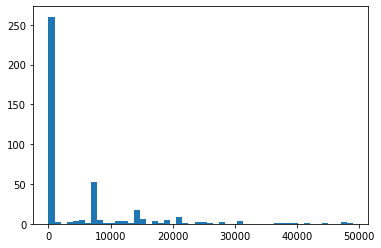

In [65]:
plt.hist(df_sub_2, bins = 50)

In [72]:
common_subsequences_of_length_2 = df_sub_2.where(lambda x: x>=20000).dropna()
common_subsequences_of_length_2.index

Index(['VA', 'GA', 'GS', 'AT', 'AA', 'SG', 'AS', 'AG', 'ST', 'PS', 'AV', 'GV',
       'NN', 'LG', 'GL', 'GT', 'TS', 'VL', 'SS', 'AP', 'YA', 'GN', 'IS', 'VQ',
       'SL', 'RG', 'SI', 'LN'],
      dtype='object')

In [ ]:
# df0.apply()

In [75]:
def extendSubsequences(subsequences, alphabet=AA_LABELS):
    extended_subsequences=[]
    for seq in subsequences:
        for c in alphabet:
            extended_subsequences.append(seq+c)
    return extended_subsequences

    

In [79]:
all_subsequences_of_length_3 = extendSubsequences(common_subsequences_of_length_2.index)

In [83]:
def subSequenceFrequency_v2(sequence, all_possibilities):   
    all_frequencies = {}
    
    for pos in all_possibilities:
        all_frequencies[pos] = sequence.count(pos)
        
    return all_frequencies

# all_subsequences_of_length_3
subsequences_3 = df0.apply(lambda x: subSequenceFrequency_v2(x['sequence'], all_subsequences_of_length_3), axis=1)

In [85]:
df_sub_3 = pd.DataFrame(list(subsequences_3))
df_sub_3 = df_sub_3.sum().sort_values(ascending=False)

/home/victor/miniconda3/envs/dupont/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/victor/miniconda3/envs/dupont/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 1.,  0.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         1.,  1.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
         2.,  4.,  0.,  0.,  0.,  1.,  2.,  1.,  1.,  0.,  0., 33., 18.,
         4.,  0.,  0.,  5.,  2.,  1.,  1.,  0.,  2.,  1.,  1.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  5.,  4.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([ 1201.  ,  1350.59,  1500.18,  1649.77,  1799.36,  1948.95,
         2098.54,  2248.13,  2397.72,  2547.31,  2696.9 ,  2846.49,
         2996.08,  3145.67,  3295.26,  3444.85,  3594.44,  3744.03,
         3893.62,  4043.21,  4192.8 ,  4342.39,  4491.98,  4641.57,
         4791.16,  4940.75,  5090.34,  5239.93,  5389.52,  5539.11,
         5688.7 ,  5838.29,  5987.88,  6137.47,  6287.06,  6436.65,
         6586.24,  6735.83

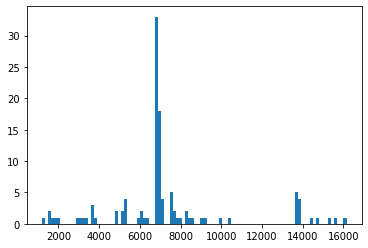

In [92]:
plt.hist(df_sub_3.where(lambda x: x>1000), bins=100)

In [107]:
common_subsequences_of_length_3 = df_sub_3.where(lambda x: x>=10000).dropna()
common_subsequences_of_length_3 = common_subsequences_of_length_3.index.values.tolist()
common_subsequences_of_length_2 = common_subsequences_of_length_2.index.values.tolist()

In [100]:
def subsequence_is_in_sequence(subsequence, sequence):
    if subsequence in sequence:
        return 1
    else:
        return 0


def subSequenceInSequence(sequence, all_possibilities):   
    all_occurrences = {}
    
    for pos in all_possibilities:
        all_occurrences[pos] = subsequence_is_in_sequence(pos, sequence)
        
    return all_occurrences


    

In [110]:
df_with_two_flags = df0.apply(lambda x: subSequenceInSequence(x['sequence'], common_subsequences_of_length_2), axis=1)
df_with_three_flags = df0.apply(lambda x: subSequenceInSequence(x['sequence'], common_subsequences_of_length_3), axis=1)

df_with_flags = pd.DataFrame(list(df_with_two_flags)).join( pd.DataFrame(list(df_with_three_flags)))

df_with_flags


,AA,AG,AP,AS,AT,AV,GA,GL,GN,GS,...,GAS,GSG,GSS,GVL,PSA,SLG,STY,VAG,VAP,VLG
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
